Small script to convert the generated process trees to petri nets and print them out.

This is before we added an artifical start and end activity, we will do that in the logs. -> DON'T FORGET

TO DO: RUN 0.45 AGAIN

In [1]:
from pm4py.objects.process_tree.importer import importer as ptml_importer

from pm4py.algo.simulation.playout.process_tree import algorithm as tree_playout

from pm4py.visualization.process_tree import visualizer as pt_visualizer

from pm4py.objects.conversion.process_tree import converter as pt_converter

from pm4py.visualization.petri_net import visualizer as pn_visualizer

from pm4py.objects.petri_net.exporter import exporter as pnml_exporter


In [2]:
def get_percentages_tree(tree):
    seq = str(tree).count('->')
    par = str(tree).count('+')
    cho = str(tree).count('X')
    return ([(seq/(seq+par+cho)), (cho/(seq+par+cho)), (par/(seq+par+cho))])

------------------- PARALLEL: 0.0 -------------------
percentages sequence, choice, parallel [0.5, 0.5, 0.0]
Number of variants: 96


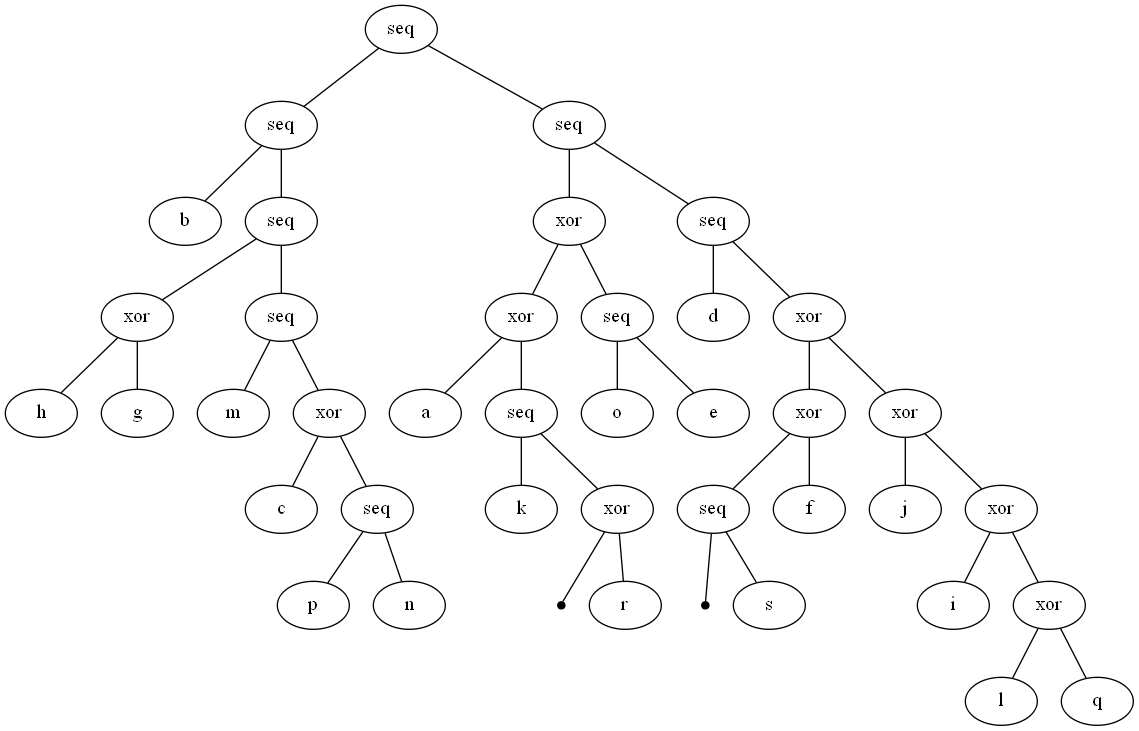

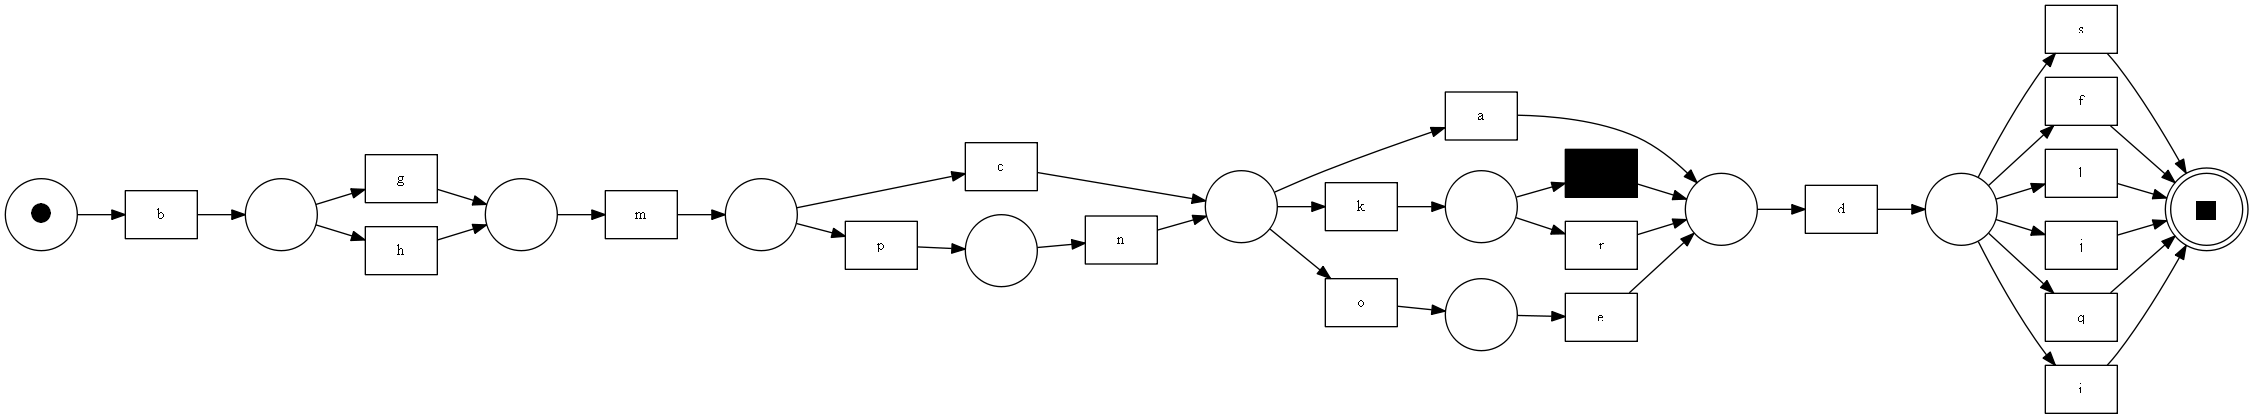

------------------- PARALLEL: 0.05 -------------------
percentages sequence, choice, parallel [0.5, 0.45, 0.05]
Number of variants: 108


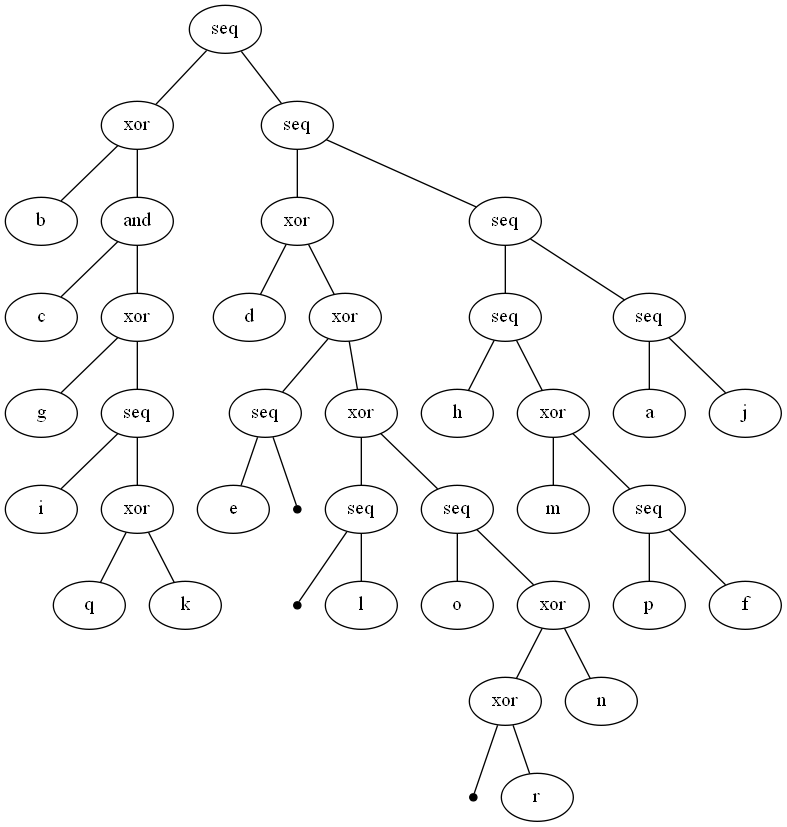

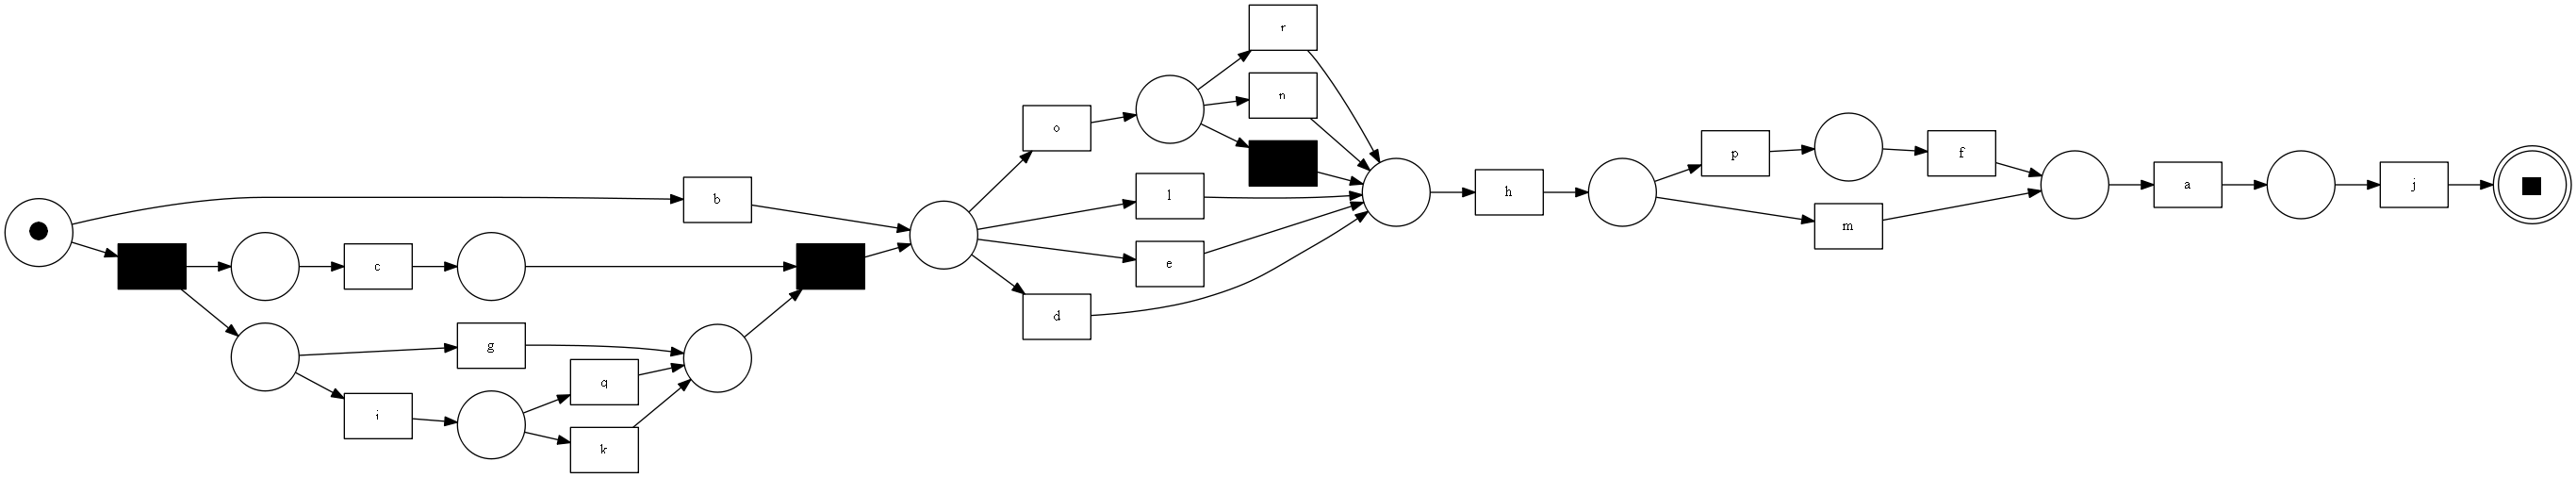

------------------- PARALLEL: 0.1 -------------------
percentages sequence, choice, parallel [0.5, 0.4, 0.1]
Number of variants: 120


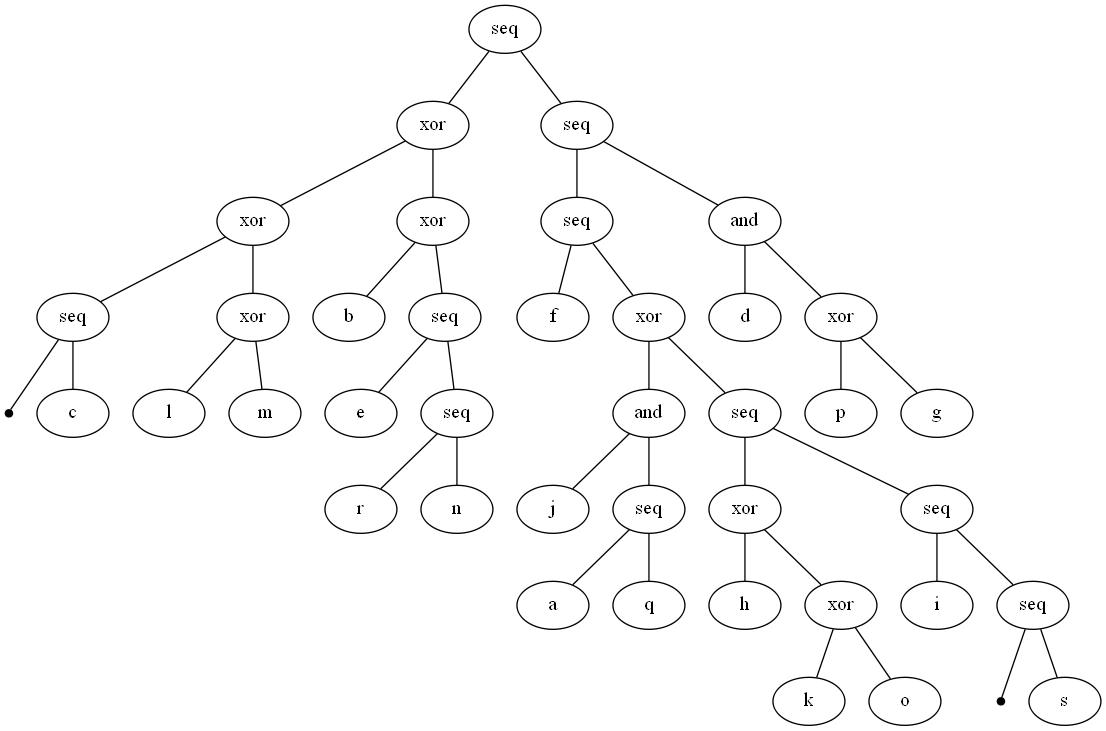

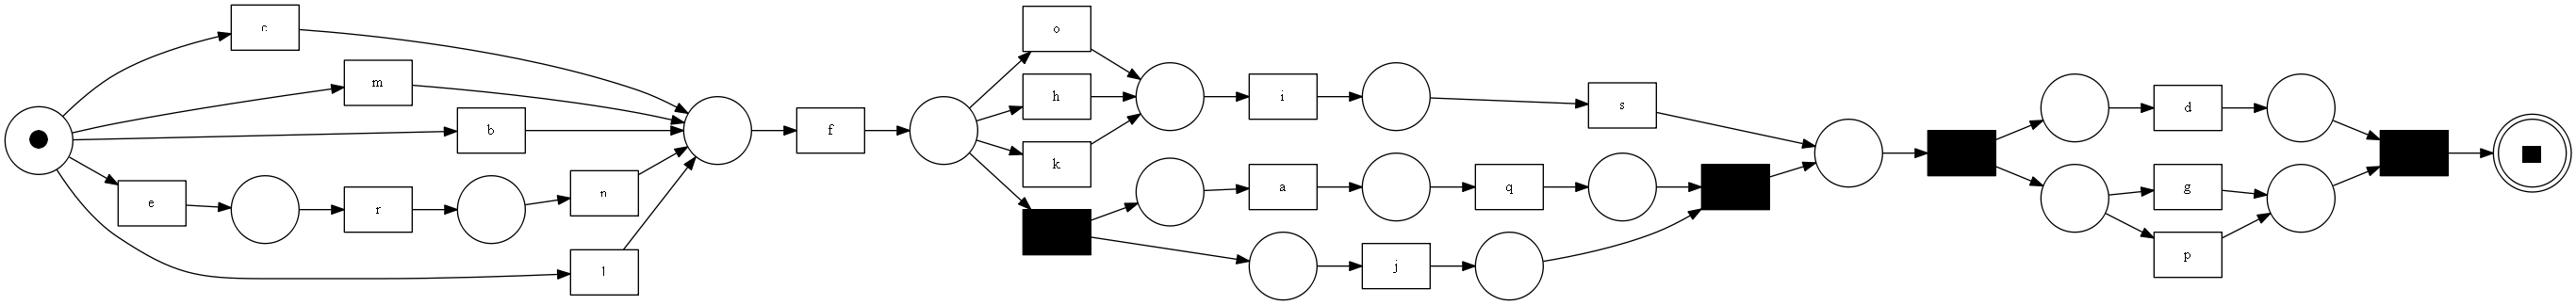

------------------- PARALLEL: 0.15 -------------------
percentages sequence, choice, parallel [0.5, 0.35, 0.15]
Number of variants: 150


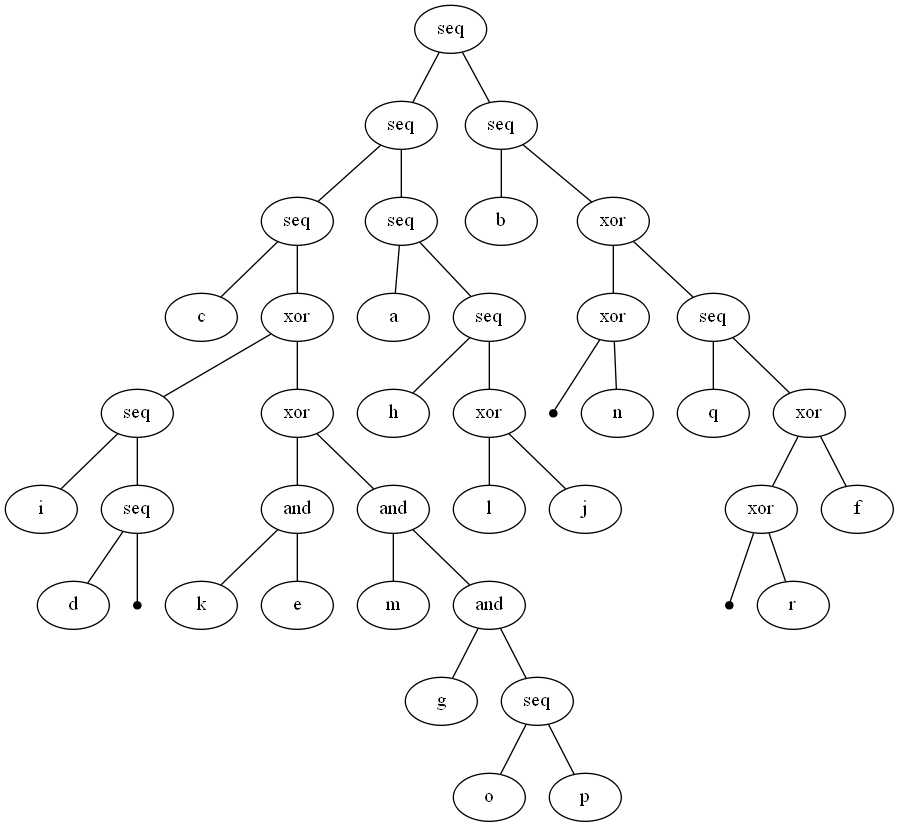

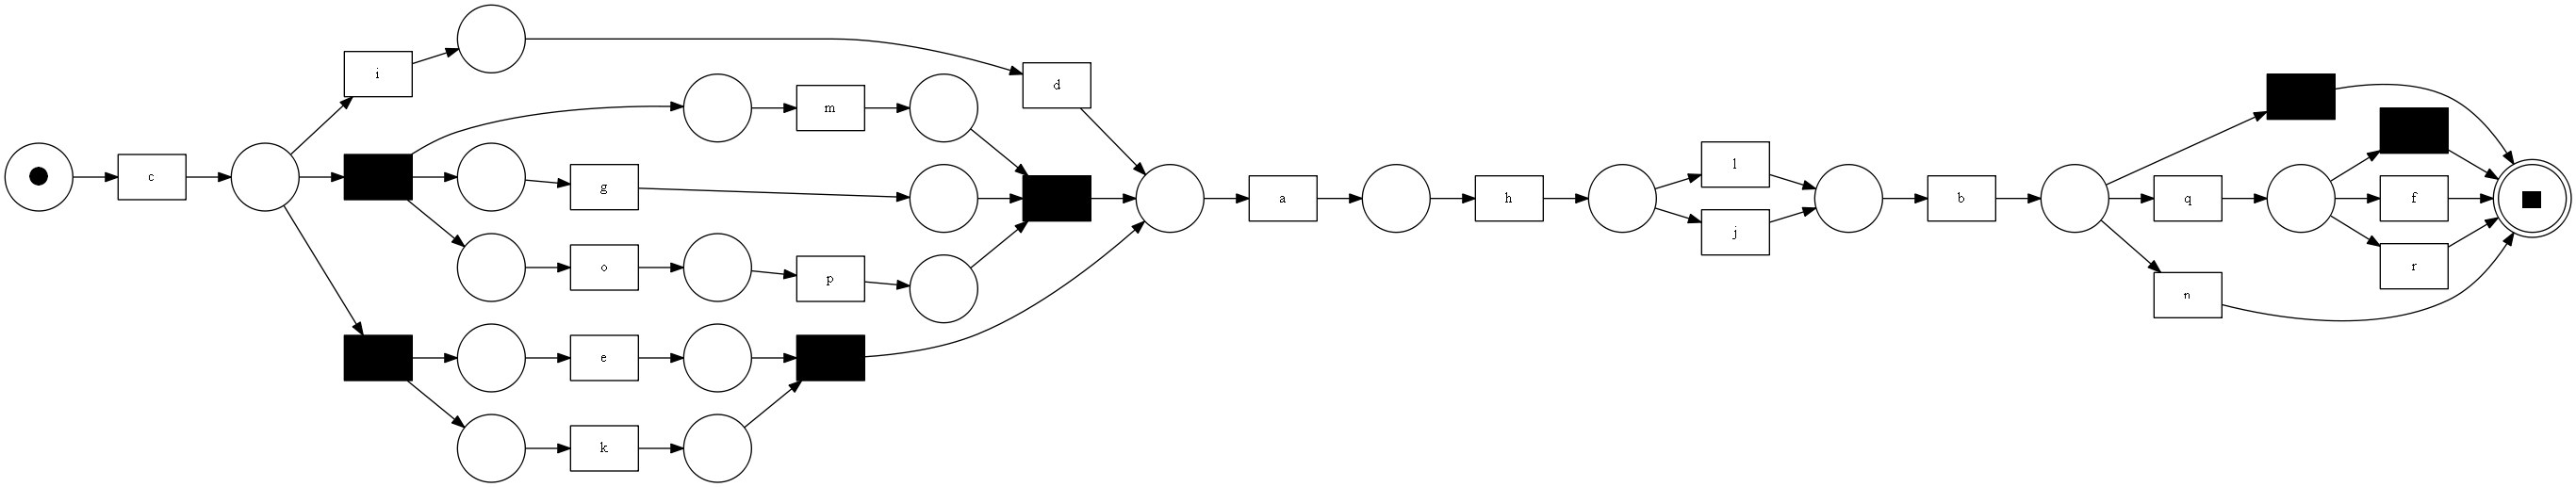

------------------- PARALLEL: 0.2 -------------------
percentages sequence, choice, parallel [0.5, 0.3, 0.2]
Number of variants: 136


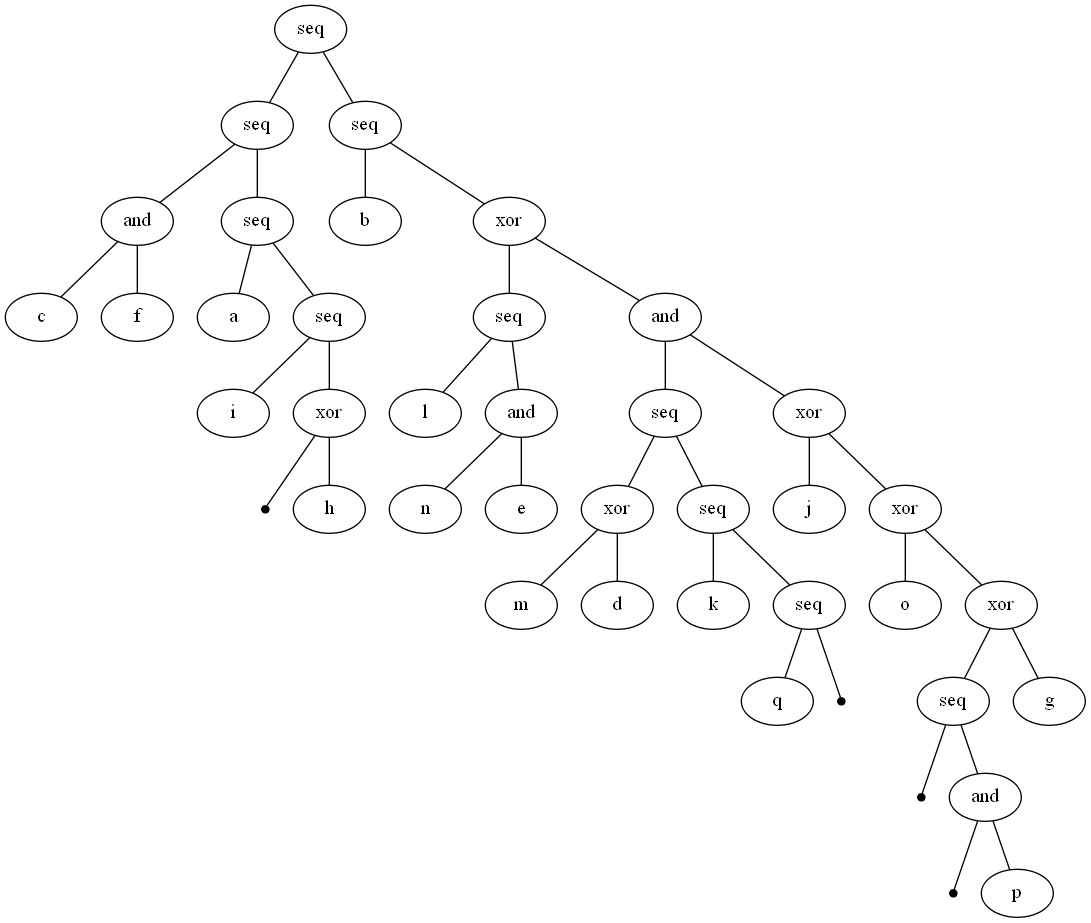

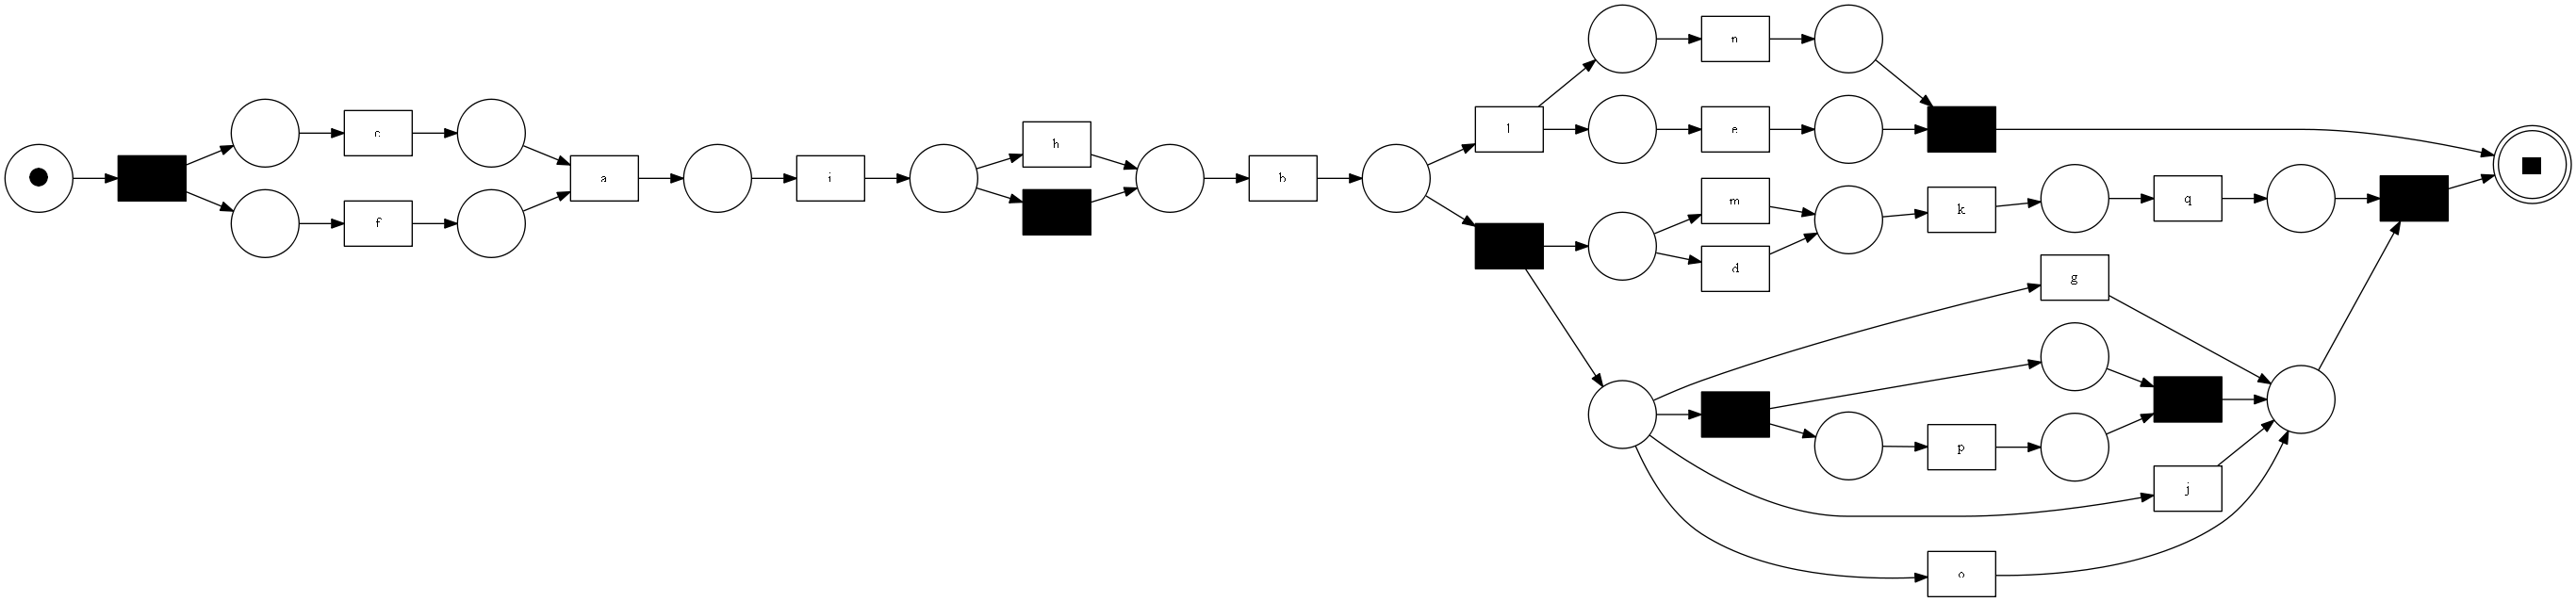

------------------- PARALLEL: 0.25 -------------------
percentages sequence, choice, parallel [0.5, 0.25, 0.25]
Number of variants: 108


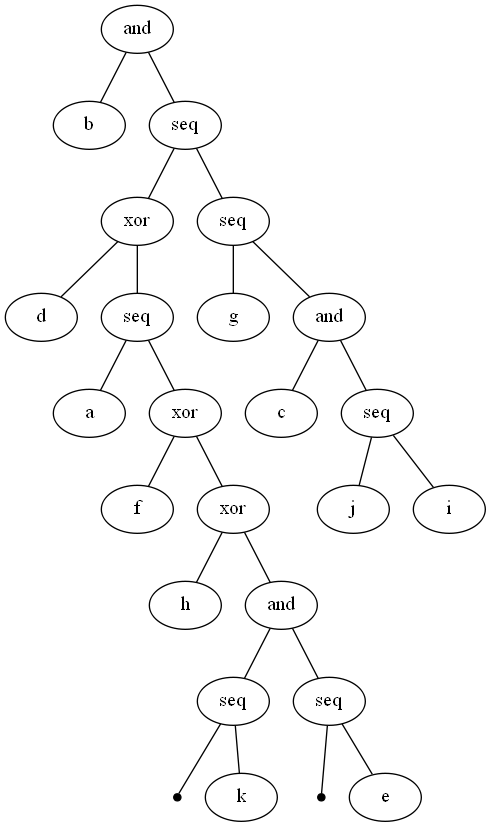

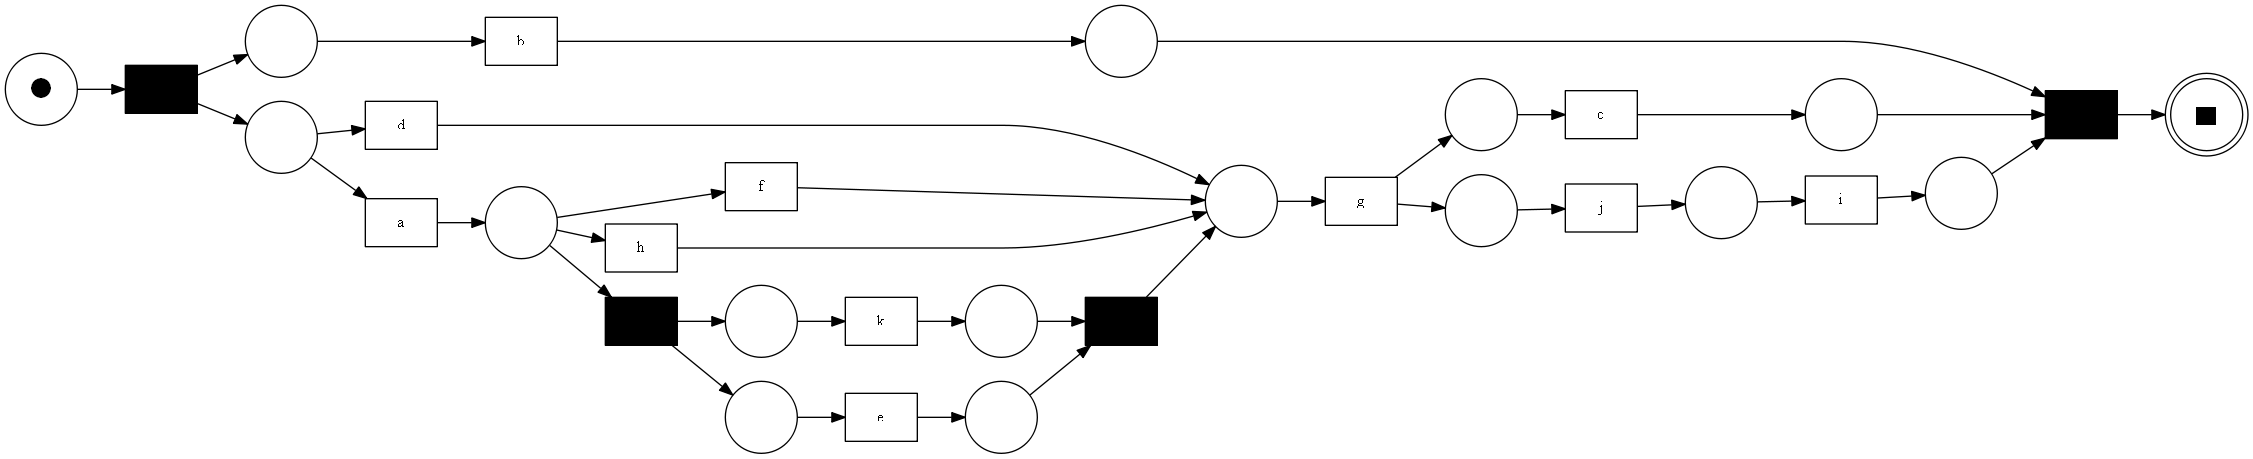

------------------- PARALLEL: 0.3 -------------------
percentages sequence, choice, parallel [0.5, 0.2, 0.3]
Number of variants: 160


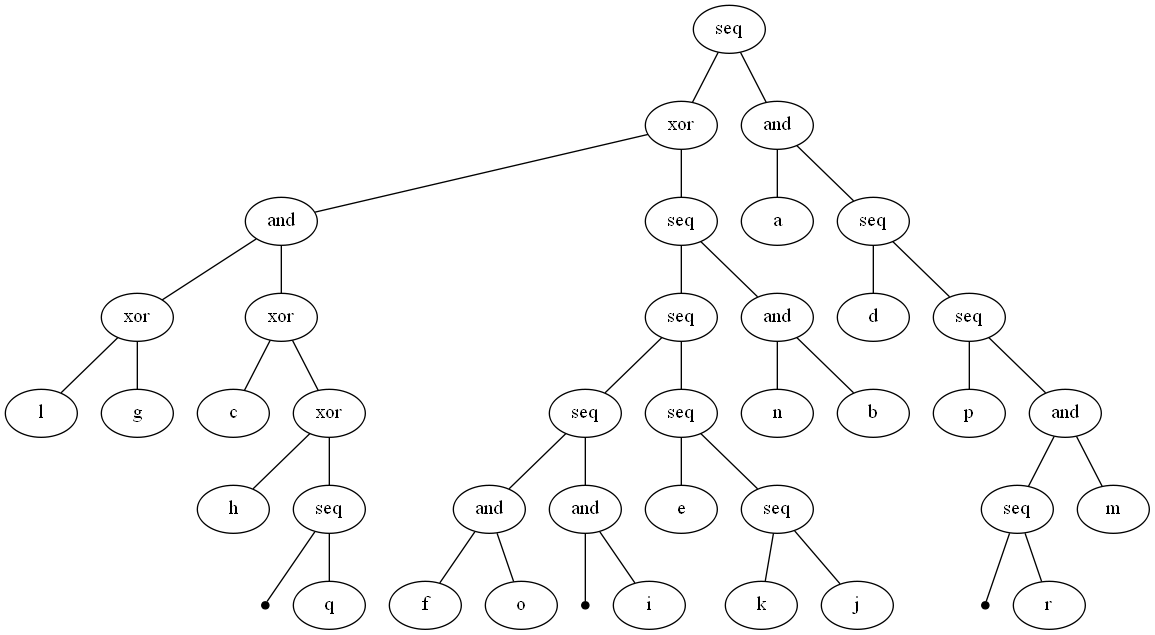

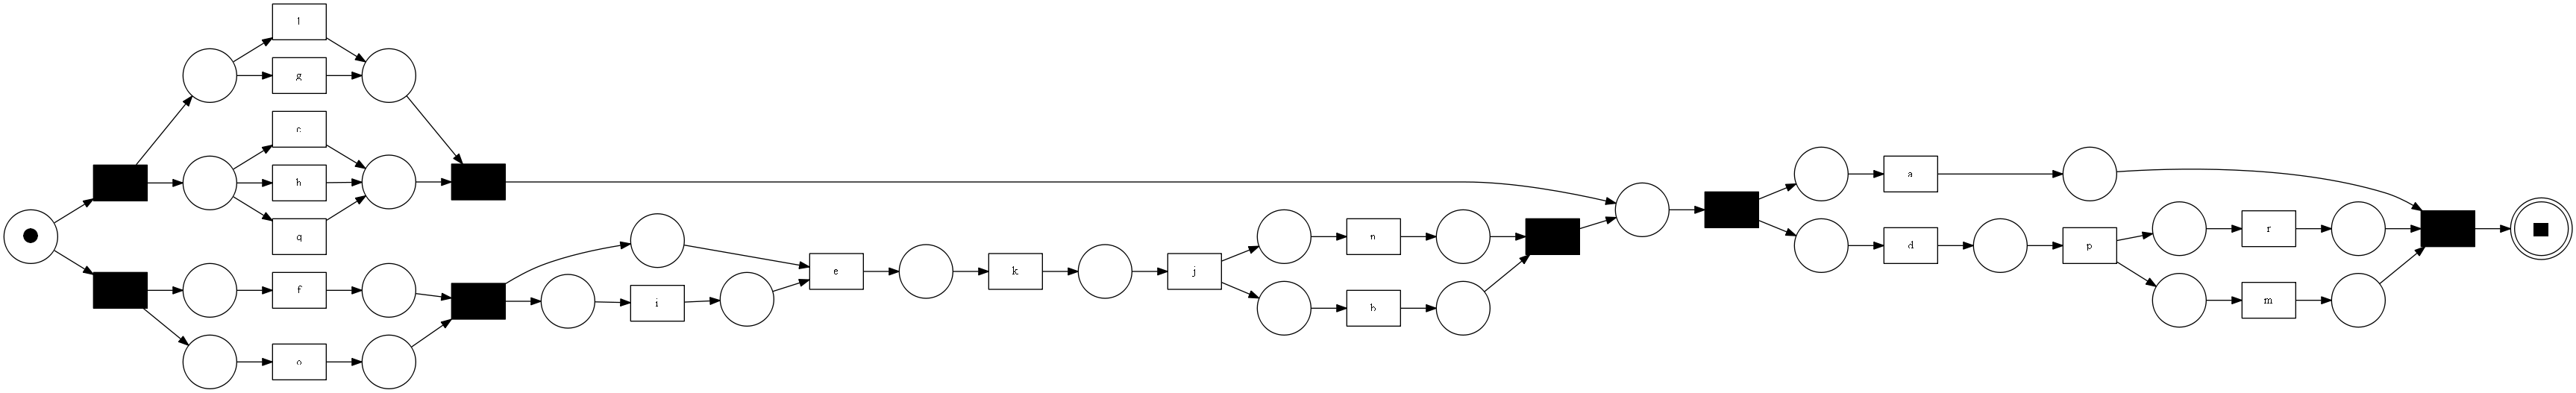

------------------- PARALLEL: 0.35 -------------------
percentages sequence, choice, parallel [0.5, 0.15, 0.35]
Number of variants: 140


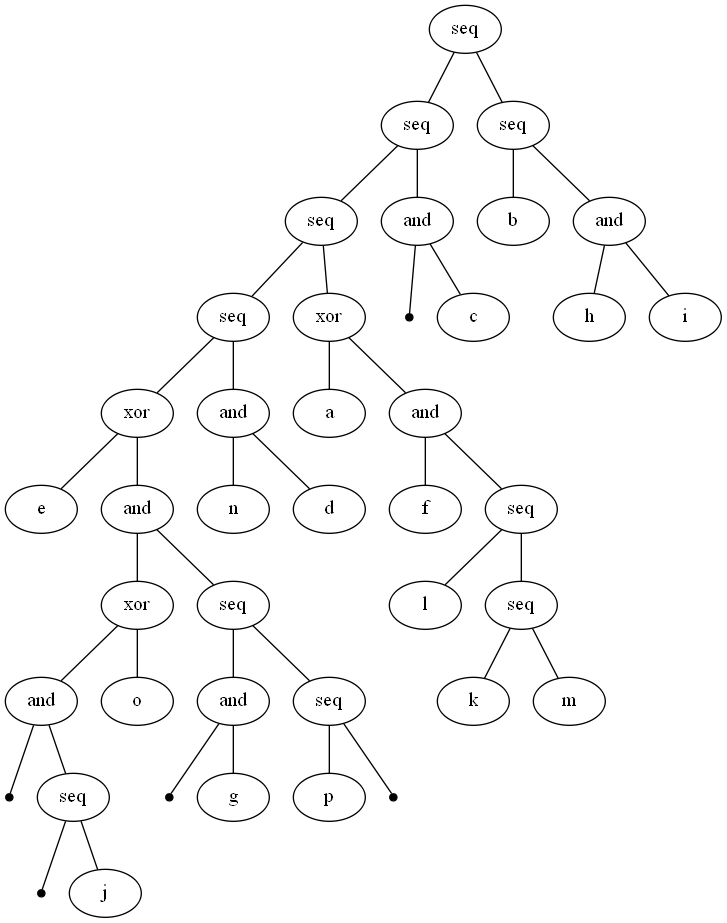

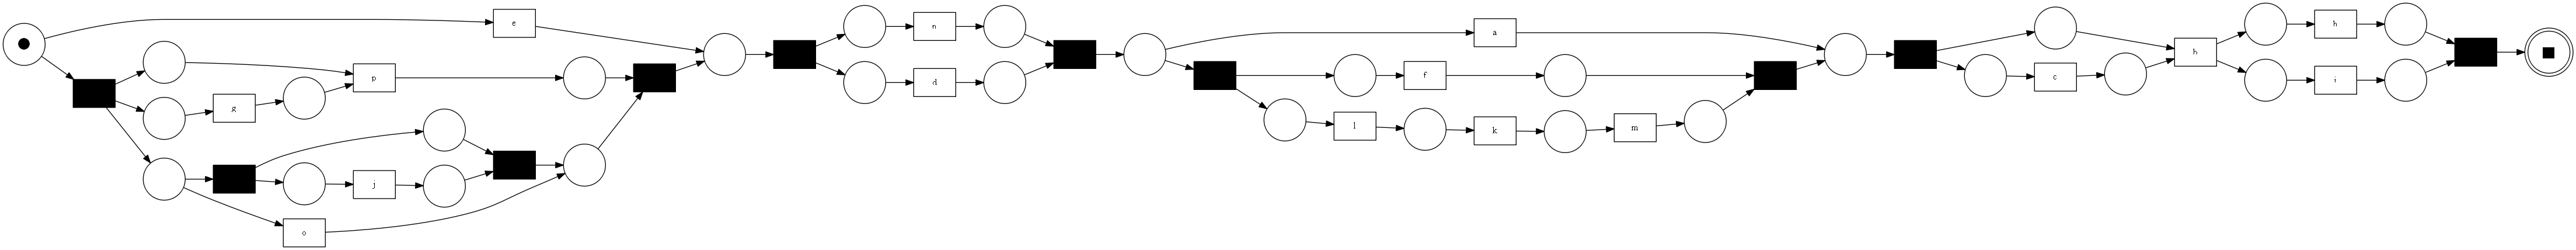

------------------- PARALLEL: 0.4 -------------------
percentages sequence, choice, parallel [0.5, 0.1, 0.4]
Number of variants: 120


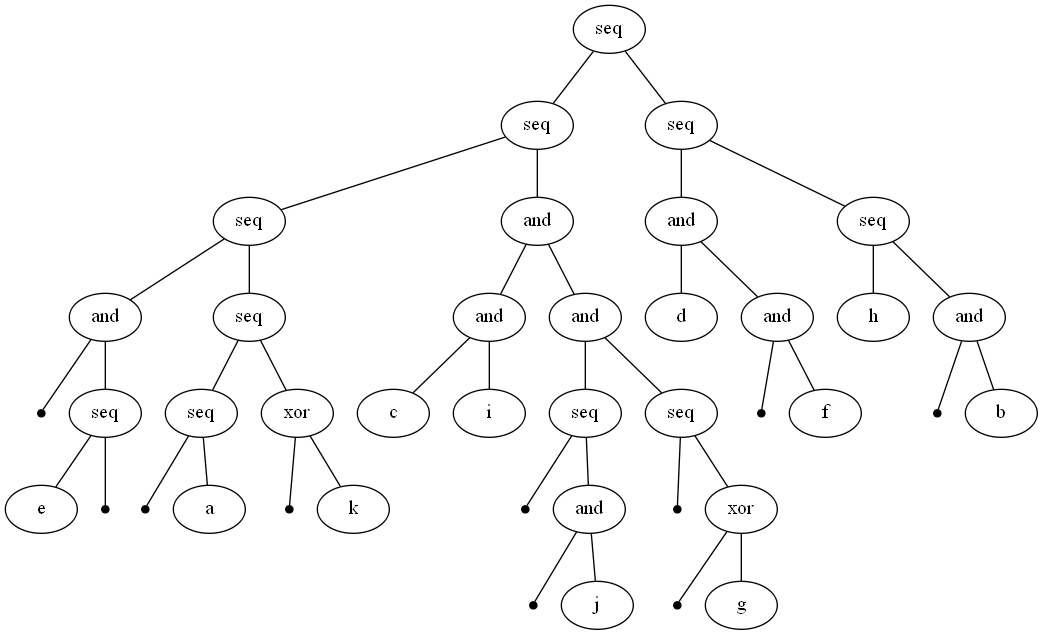

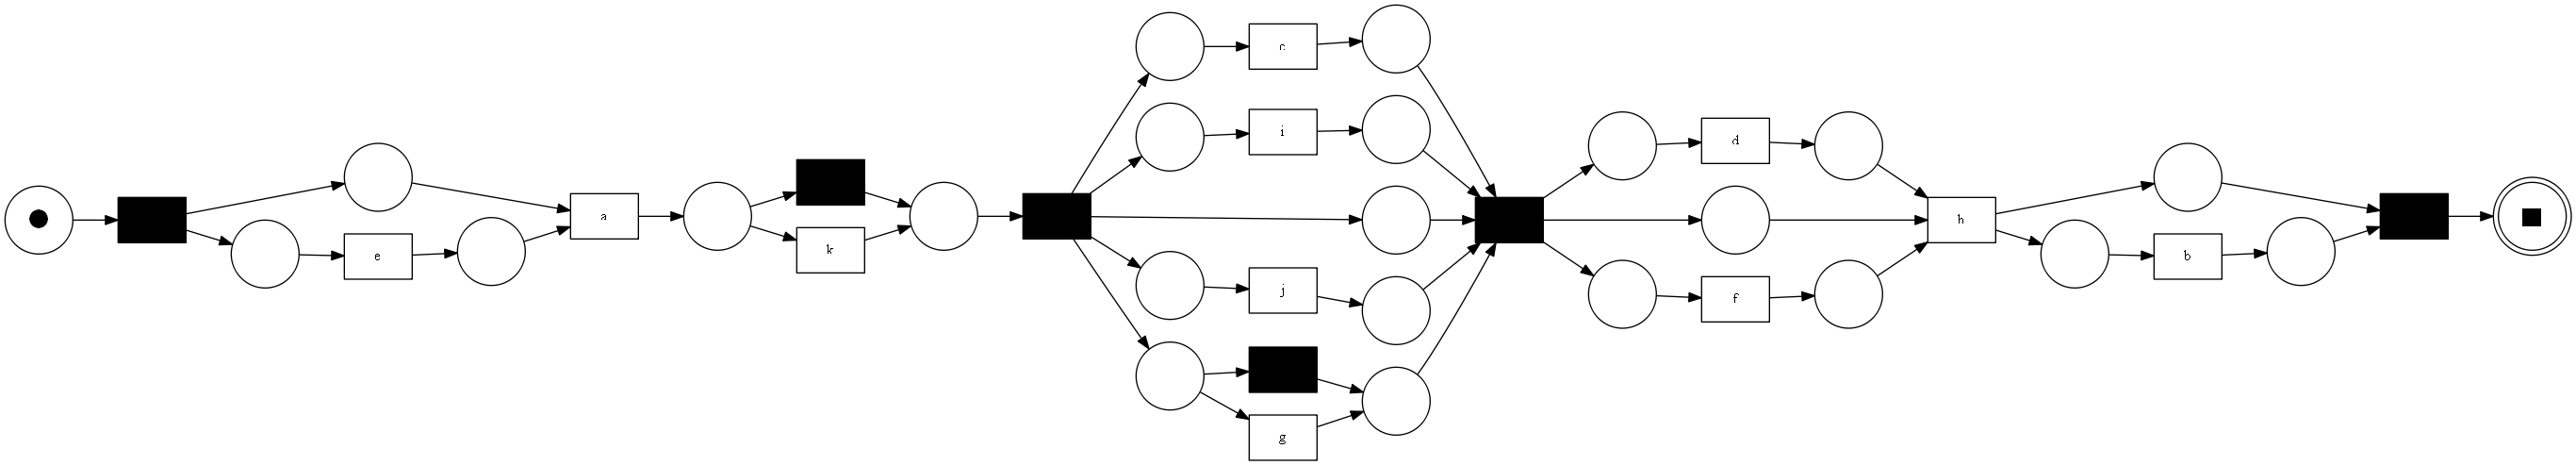

------------------- PARALLEL: 0.45 -------------------
percentages sequence, choice, parallel [0.5454545454545454, 0.0, 0.45454545454545453]
Number of variants: 120


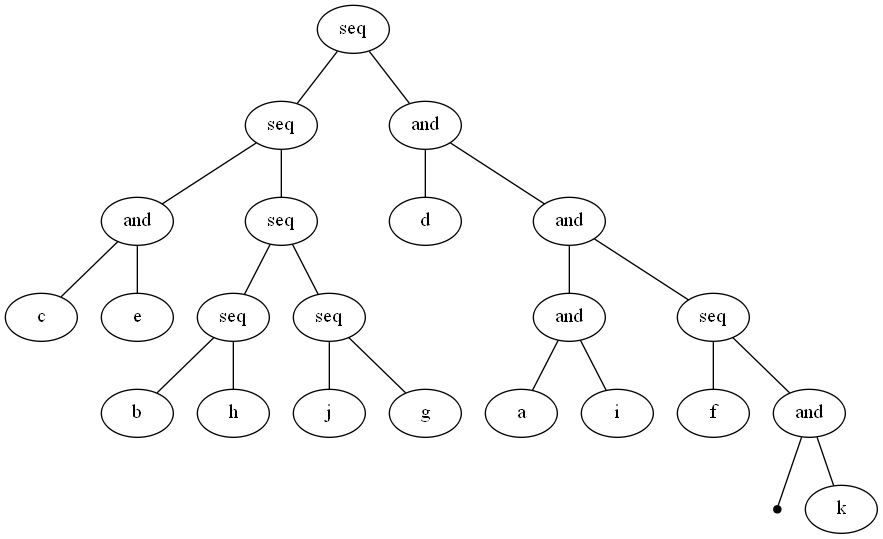

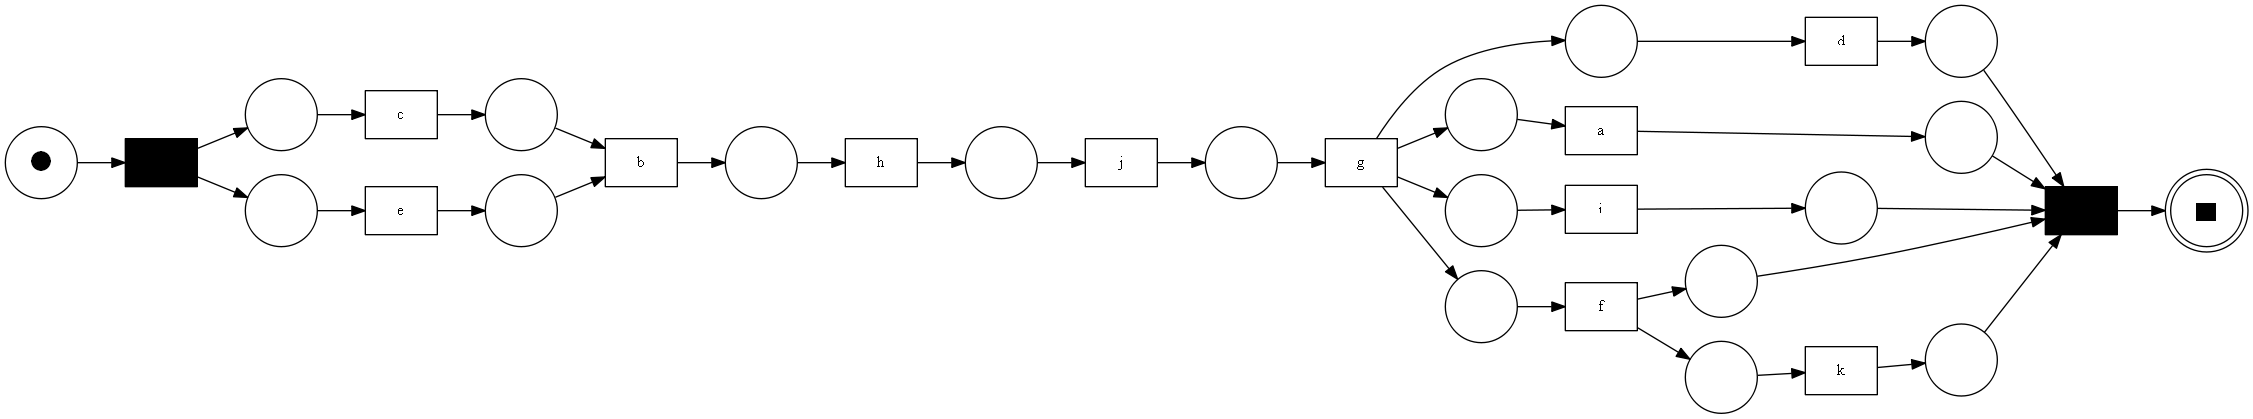

------------------- PARALLEL: 0.5 -------------------
percentages sequence, choice, parallel [0.5, 0.0, 0.5]
Number of variants: 144


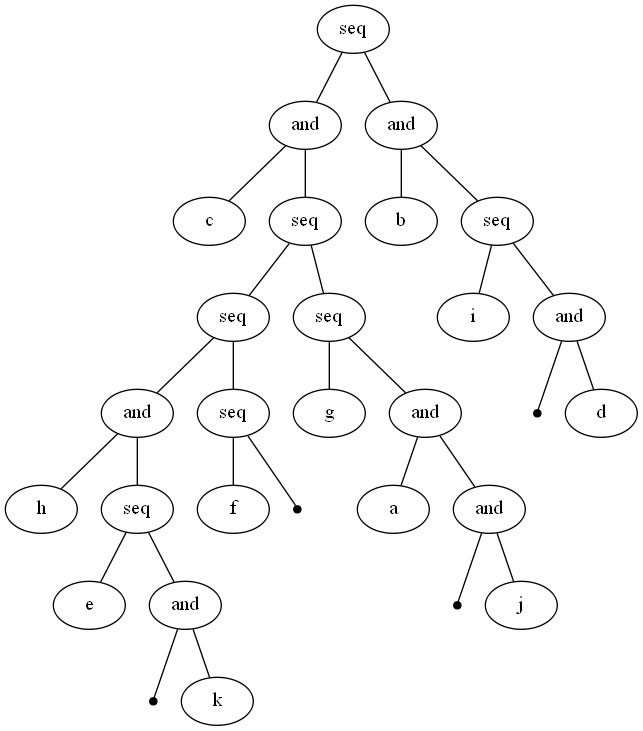

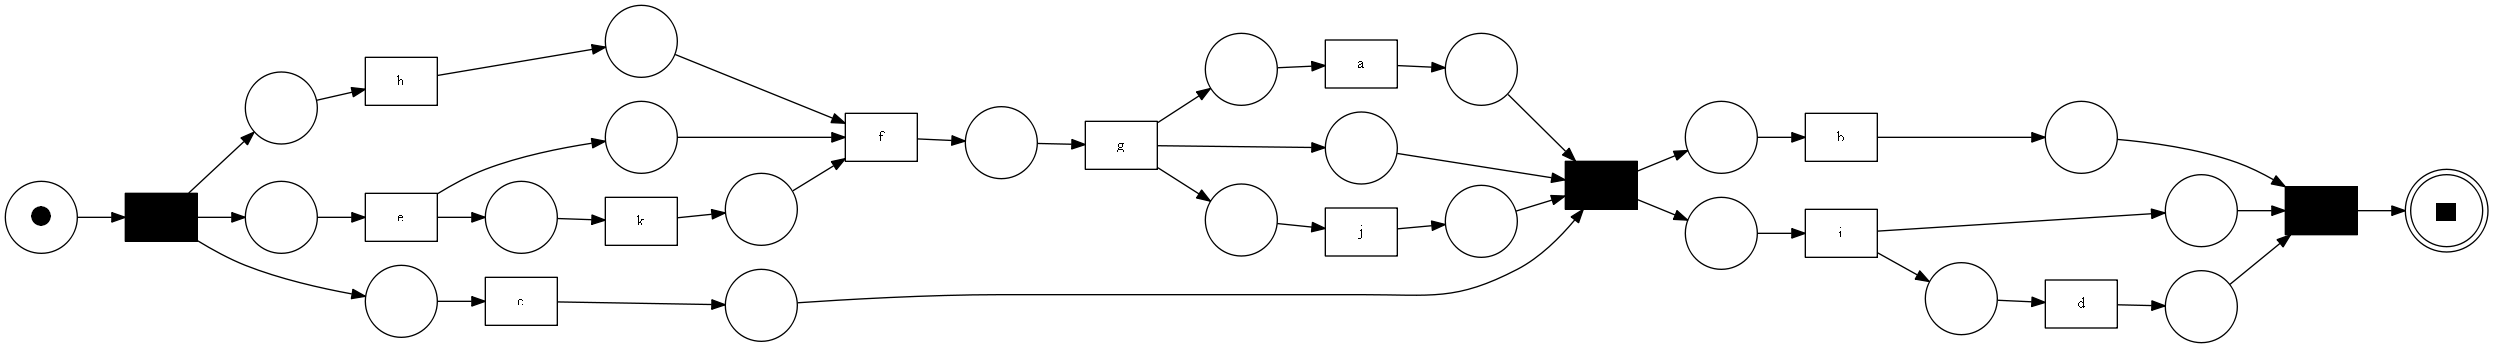

In [4]:
parallel_options = [0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]

for parallel in parallel_options:
    print("------------------- PARALLEL:", parallel, "-------------------")
    filename_tree = "Trees/tree_par" + "{:.2f}".format(parallel)[2:] + ".ptml"
    filename_PN = "Nets/PN_par" + "{:.2f}".format(parallel)[2:] + ".pnml"
    
    tree = ptml_importer.apply(filename_tree)
    
    print("percentages sequence, choice, parallel", get_percentages_tree(tree))
    
    playout_variant = tree_playout.Variants.EXTENSIVE
    param = tree_playout.Variants.EXTENSIVE.value.Parameters
    variants = tree_playout.apply(tree, variant=playout_variant, parameters={param.MAX_TRACE_LENGTH: 200, param.MAX_LOOP_OCC: 3, param.MAX_LIMIT_NUM_TRACES: 200})
    print("Number of variants:", len(variants))
    
    gviz = pt_visualizer.apply(tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
    pt_visualizer.view(gviz)
    
    net, im, fm = pt_converter.apply(tree)
       
    gviz = pn_visualizer.apply(net, im, fm)
    pn_visualizer.view(gviz)
    
    pnml_exporter.apply(net, im, filename_PN)